## Sentiment Analysis of Mastodon and X Tweets

In [76]:
%pip install nltk
%pip install langdetect


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jawad\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


Using legacy 'setup.py install' for langdetect, since package 'wheel' is not installed.
    Running setup.py install for langdetect: started
    Running setup.py install for langdetect: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jawad\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from langdetect import detect

##### Load Data from CSV files

In [54]:
twitter_df = pd.read_csv("x_tweets.csv")
mastodon_df = pd.read_csv("mast_toots.csv")
mastodon_ai_df = pd.read_csv("ai_toots.csv")

### Mastodon toot Analysis & Cleaning

In [55]:
lang_count = mastodon_df['language'].value_counts()
lang_count.values

array([2769,  369,  318,  212,  130,  127,   42,   41,   39,   30,   24,
         14,   12,   10,    8,    7,    6,    5,    4,    4,    4,    2,
          2,    2,    2,    2,    2], dtype=int64)

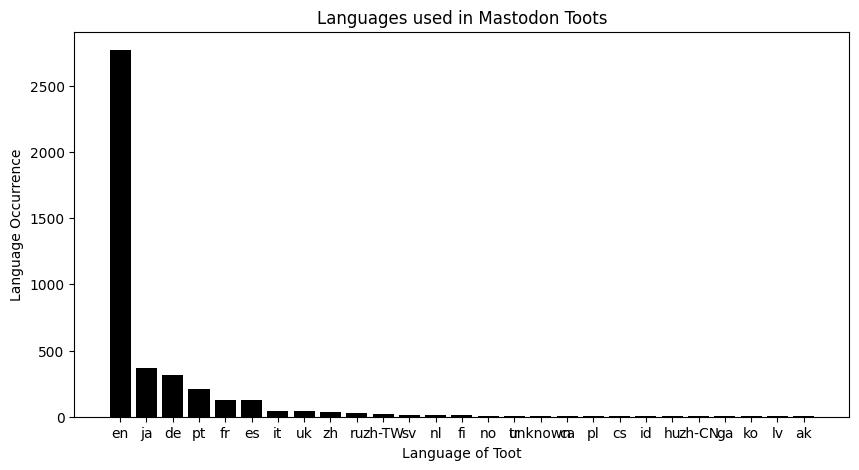

In [56]:
fig = plt.figure(figsize = (10, 5))

plt.bar(lang_count.keys(), lang_count.values, color ='black')

plt.xlabel("Language of Toot")
plt.ylabel("Language Occurrence")
plt.title("Languages used in Mastodon Toots")
plt.show()

In [57]:
eng_mast = mastodon_df[mastodon_df['language'] == 'en']
eng_mast

,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags
1,113656318036682683,2024-12-15 10:16:04+00:00,Apple पहली AI सर्वर चिप विकसित करने के लिए ब्र...,en,0,0,0,public,"[{'name': 'एपपलऐचप', 'url': 'https://mastodon...."
2,113656300068958166,2024-12-15 10:11:25+00:00,How to Share Screen With ChatGPT to Solve Tech...,en,0,1,0,public,[]
3,113656278694692626,2024-12-15 10:06:19+00:00,Use AI Prompt Library to Help Better Harness C...,en,0,1,0,public,[]
4,113656271097934924,2024-12-15 10:04:26.317000+00:00,ChatGPT to Get Video FeaturesChatGPT is evolvi...,en,0,3,1,public,"[{'name': 'news', 'url': 'https://mastodon.soc..."
6,113656241243366429,2024-12-15 09:56:50.771000+00:00,Techinternetz: The Simple ChatGPT Trick That W...,en,0,0,0,public,[]
...,...,...,...,...,...,...,...,...,...
4231,113618818956268430,2024-12-08 19:19:51.986000+00:00,"I’m on https://worldhappiness.report, and I ca...",en,1,0,0,public,[]
4232,113618772512485573,2024-12-08 19:08:01+00:00,@garo ChatGPT can say a lot. But aren't you th...,en,0,0,0,public,[]
4233,113618742237574535,2024-12-08 19:00:17+00:00,I wanted a browser extension to search selecte...,en,1,1,1,public,"[{'name': 'llm', 'url': 'https://mastodon.soci..."
4234,113618647710948949,2024-12-08 18:36:14+00:00,I asked ChatGPT to generate a diagram of Maslo...,en,0,0,0,public,[]


In [79]:
def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False  # Handle cases where detection fails

# Filter the DataFrame for English texts
eng_mast['is_english'] = eng_mast['content'].apply(is_english)
eng_mast = eng_mast[eng_mast['is_english']]

eng_mast

C:\Users\jawad\AppData\Local\Temp\ipykernel_11408\3408254763.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mast['is_english'] = eng_mast['content'].apply(is_english)


,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags,is_english
2,113656300068958166,2024-12-15 10:11:25+00:00,how to share screen with chatgpt to solve tech...,en,0,1,0,public,[],True
3,113656278694692626,2024-12-15 10:06:19+00:00,use ai prompt library to help better harness c...,en,0,1,0,public,[],True
4,113656271097934924,2024-12-15 10:04:26.317000+00:00,chatgpt to get video featureschatgpt is evolvi...,en,0,3,1,public,"[{'name': 'news', 'url': 'https://mastodon.soc...",True
6,113656241243366429,2024-12-15 09:56:50.771000+00:00,techinternetz the simple chatgpt trick that wi...,en,0,0,0,public,[],True
7,113656231693395271,2024-12-15 09:54:22+00:00,chatgpt vs perplexity battle of the ai search ...,en,0,1,0,public,[],True
...,...,...,...,...,...,...,...,...,...,...
4231,113618818956268430,2024-12-08 19:19:51.986000+00:00,im on and i cant find the part of the page th...,en,1,0,0,public,[],True
4232,113618772512485573,2024-12-08 19:08:01+00:00,garo chatgpt can say a lot but arent you the o...,en,0,0,0,public,[],True
4233,113618742237574535,2024-12-08 19:00:17+00:00,i wanted a browser extension to search selecte...,en,1,1,1,public,"[{'name': 'llm', 'url': 'https://mastodon.soci...",True
4234,113618647710948949,2024-12-08 18:36:14+00:00,i asked chatgpt to generate a diagram of maslo...,en,0,0,0,public,[],True


In [80]:
# Cleaning Toot content from punctuation, URLs and @s:
eng_mast['content'] = eng_mast['content'].replace(r'[^\w\s]', '', regex=True)
eng_mast['content'] = eng_mast['content'].replace(r'@\w+', '', regex=True)
eng_mast['content'] = eng_mast['content'].replace(r'http\S+|www\S+', '', regex=True)

eng_mast['content'] = eng_mast['content'].str.lower()

cleaned_mast = eng_mast.copy()
cleaned_mast = cleaned_mast.dropna()
cleaned_mast

C:\Users\jawad\AppData\Local\Temp\ipykernel_11408\2654942175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mast['content'] = eng_mast['content'].replace(r'[^\w\s]', '', regex=True)
C:\Users\jawad\AppData\Local\Temp\ipykernel_11408\2654942175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mast['content'] = eng_mast['content'].replace(r'@\w+', '', regex=True)
C:\Users\jawad\AppData\Local\Temp\ipykernel_11408\2654942175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags,is_english
2,113656300068958166,2024-12-15 10:11:25+00:00,how to share screen with chatgpt to solve tech...,en,0,1,0,public,[],True
3,113656278694692626,2024-12-15 10:06:19+00:00,use ai prompt library to help better harness c...,en,0,1,0,public,[],True
4,113656271097934924,2024-12-15 10:04:26.317000+00:00,chatgpt to get video featureschatgpt is evolvi...,en,0,3,1,public,"[{'name': 'news', 'url': 'https://mastodon.soc...",True
6,113656241243366429,2024-12-15 09:56:50.771000+00:00,techinternetz the simple chatgpt trick that wi...,en,0,0,0,public,[],True
7,113656231693395271,2024-12-15 09:54:22+00:00,chatgpt vs perplexity battle of the ai search ...,en,0,1,0,public,[],True
...,...,...,...,...,...,...,...,...,...,...
4231,113618818956268430,2024-12-08 19:19:51.986000+00:00,im on and i cant find the part of the page th...,en,1,0,0,public,[],True
4232,113618772512485573,2024-12-08 19:08:01+00:00,garo chatgpt can say a lot but arent you the o...,en,0,0,0,public,[],True
4233,113618742237574535,2024-12-08 19:00:17+00:00,i wanted a browser extension to search selecte...,en,1,1,1,public,"[{'name': 'llm', 'url': 'https://mastodon.soci...",True
4234,113618647710948949,2024-12-08 18:36:14+00:00,i asked chatgpt to generate a diagram of maslo...,en,0,0,0,public,[],True


In [81]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jawad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [82]:
snet_analyzer = SentimentIntensityAnalyzer()
content_list = cleaned_mast['content'].values
sentiments = []

for con in content_list:
    sent = snet_analyzer.polarity_scores(con)
    sentiments.append(sent)

In [83]:
sent_df = pd.DataFrame(sentiments)
mast_sent = pd.concat([cleaned_mast.reset_index(drop=True), sent_df], axis=1)
mast_sent

,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags,is_english,neg,neu,pos,compound
0,113656300068958166,2024-12-15 10:11:25+00:00,how to share screen with chatgpt to solve tech...,en,0,1,0,public,[],True,0.000,0.717,0.283,0.7269
1,113656278694692626,2024-12-15 10:06:19+00:00,use ai prompt library to help better harness c...,en,0,1,0,public,[],True,0.000,0.661,0.339,0.8271
2,113656271097934924,2024-12-15 10:04:26.317000+00:00,chatgpt to get video featureschatgpt is evolvi...,en,0,3,1,public,"[{'name': 'news', 'url': 'https://mastodon.soc...",True,0.000,0.919,0.081,0.4391
3,113656241243366429,2024-12-15 09:56:50.771000+00:00,techinternetz the simple chatgpt trick that wi...,en,0,0,0,public,[],True,0.098,0.902,0.000,-0.0516
4,113656231693395271,2024-12-15 09:54:22+00:00,chatgpt vs perplexity battle of the ai search ...,en,0,1,0,public,[],True,0.126,0.725,0.150,0.1280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629,113618818956268430,2024-12-08 19:19:51.986000+00:00,im on and i cant find the part of the page th...,en,1,0,0,public,[],True,0.000,1.000,0.000,0.0000
2630,113618772512485573,2024-12-08 19:08:01+00:00,garo chatgpt can say a lot but arent you the o...,en,0,0,0,public,[],True,0.100,0.760,0.139,0.5110
2631,113618742237574535,2024-12-08 19:00:17+00:00,i wanted a browser extension to search selecte...,en,1,1,1,public,"[{'name': 'llm', 'url': 'https://mastodon.soci...",True,0.074,0.856,0.069,-0.1154
2632,113618647710948949,2024-12-08 18:36:14+00:00,i asked chatgpt to generate a diagram of maslo...,en,0,0,0,public,[],True,0.000,1.000,0.000,0.0000


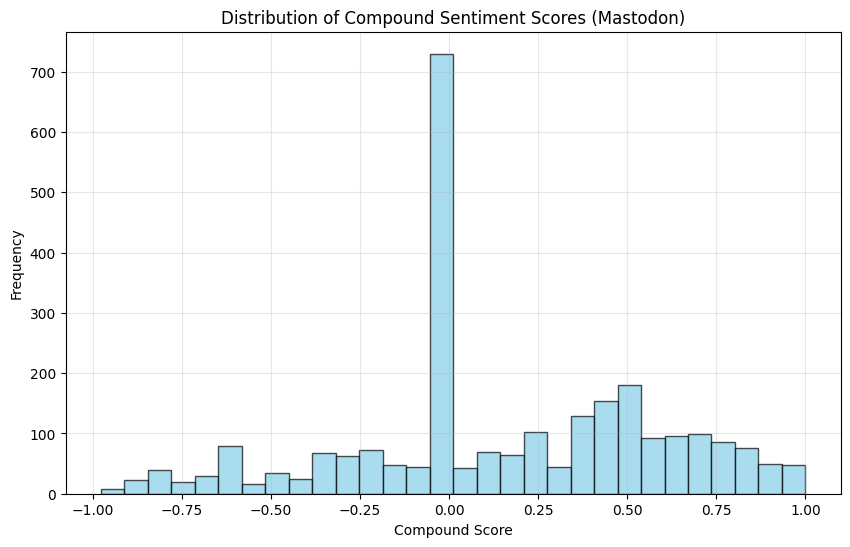

In [84]:
plt.figure(figsize=(10, 6))
plt.hist(mast_sent['compound'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Compound Sentiment Scores (Mastodon)")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

In [85]:
def classify_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

mast_sent['sentiment_label'] = mast_sent['compound'].apply(classify_sentiment)

Sentiment Distribution:
 sentiment_label
positive    0.480258
neutral     0.311314
negative    0.208428
Name: proportion, dtype: float64


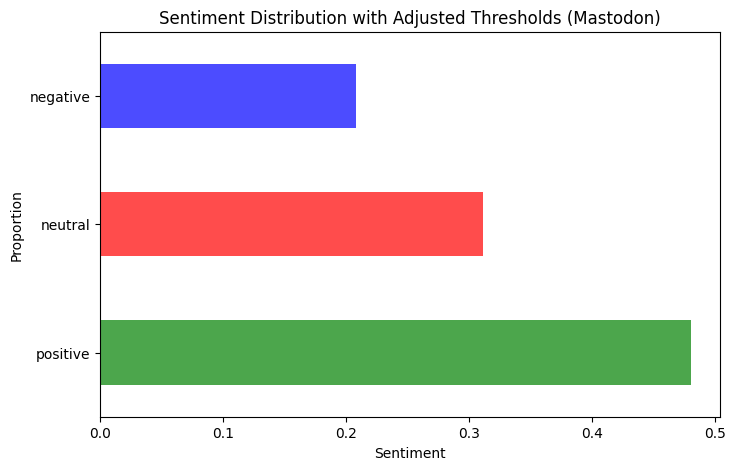

In [86]:
sentiment_distribution = mast_sent['sentiment_label'].value_counts(normalize=True)
print("Sentiment Distribution:\n", sentiment_distribution)

plt.figure(figsize=(8, 5))
sentiment_distribution.plot(kind='barh', color=['green', 'red', 'blue'], alpha=0.7)
plt.title("Sentiment Distribution with Adjusted Thresholds (Mastodon)")
plt.xlabel("Sentiment")
plt.ylabel("Proportion")
plt.show()

### X tweets Analysis & Cleaning

In [88]:
def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False  # Handle cases where detection fails

# Filter the DataFrame for English texts
twitter_df['is_english'] = twitter_df['text'].apply(is_english)
eng_twit = twitter_df[twitter_df['is_english']]

eng_twit

,id,created_at,text,lang,retweet_count,reply_count,like_count,quote_count,is_english
0,1866062987494379873,2024-12-09 10:11:00+00:00,wts wtb jual netflix 1p2u 20k 1p1u 32k wetvyou...,en,0,0,0,0,True
1,1866062894993215811,2024-12-09 10:10:38+00:00,think nvidia is overvalued let me remind you ...,en,0,0,0,0,True
2,1866062875489677734,2024-12-09 10:10:33+00:00,jual beli wts wtb aplikasi premium spotify cha...,en,0,0,0,0,True
3,1866062713010500070,2024-12-09 10:09:55+00:00,16 just watched an ai try to pull an ex machin...,en,0,1,0,0,True
4,1866062656446353708,2024-12-09 10:09:41+00:00,i explained the x of elon tsla shorts recitin...,en,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...
295,1866035274406404253,2024-12-09 08:20:53+00:00,if one more classmate pulls chatgpt up in blow...,en,0,1,5,0,True
296,1866035264088662348,2024-12-09 08:20:50+00:00,jual beli app premium wts wtb netflix murah di...,en,0,0,0,0,True
297,1866035240604676243,2024-12-09 08:20:45+00:00,chatgpt please ai generate image of bart simps...,en,0,2,28,0,True
298,1866035197122396236,2024-12-09 08:20:34+00:00,hello chatgpt,en,0,0,0,0,True


In [93]:
eng_twit['text'] = eng_twit['text'].replace(r'[^\w\s]', '', regex=True)
eng_twit['text'] = eng_twit['text'].replace(r'@\w+', '', regex=True)
eng_twit['text'] = eng_twit['text'].replace(r'http\S+|www\S+', '', regex=True)
eng_twit['text'] = eng_twit['text'].replace(r'\n+', ' ', regex=True)

eng_twit['text'] = eng_twit['text'].str.lower()

cleaned_twit = eng_twit.copy()
cleaned_twit = cleaned_twit.dropna()
cleaned_twit

C:\Users\jawad\AppData\Local\Temp\ipykernel_11408\1543402628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_twit['text'] = eng_twit['text'].replace(r'[^\w\s]', '', regex=True)
C:\Users\jawad\AppData\Local\Temp\ipykernel_11408\1543402628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_twit['text'] = eng_twit['text'].replace(r'@\w+', '', regex=True)
C:\Users\jawad\AppData\Local\Temp\ipykernel_11408\1543402628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,id,created_at,text,lang,retweet_count,reply_count,like_count,quote_count,is_english
0,1866062987494379873,2024-12-09 10:11:00+00:00,wts wtb jual netflix 1p2u 20k 1p1u 32k wetvyou...,en,0,0,0,0,True
1,1866062894993215811,2024-12-09 10:10:38+00:00,think nvidia is overvalued let me remind you ...,en,0,0,0,0,True
2,1866062875489677734,2024-12-09 10:10:33+00:00,jual beli wts wtb aplikasi premium spotify cha...,en,0,0,0,0,True
3,1866062713010500070,2024-12-09 10:09:55+00:00,16 just watched an ai try to pull an ex machin...,en,0,1,0,0,True
4,1866062656446353708,2024-12-09 10:09:41+00:00,i explained the x of elon tsla shorts recitin...,en,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...
295,1866035274406404253,2024-12-09 08:20:53+00:00,if one more classmate pulls chatgpt up in blow...,en,0,1,5,0,True
296,1866035264088662348,2024-12-09 08:20:50+00:00,jual beli app premium wts wtb netflix murah di...,en,0,0,0,0,True
297,1866035240604676243,2024-12-09 08:20:45+00:00,chatgpt please ai generate image of bart simps...,en,0,2,28,0,True
298,1866035197122396236,2024-12-09 08:20:34+00:00,hello chatgpt,en,0,0,0,0,True


In [94]:
content_list = cleaned_twit['text'].values
sentiments_twit = []

for con in content_list:
    sent = snet_analyzer.polarity_scores(con)
    sentiments_twit.append(sent)

In [95]:
sent_df_twit = pd.DataFrame(sentiments_twit)
twit_sent = pd.concat([cleaned_twit.reset_index(drop=True), sent_df_twit], axis=1)
twit_sent

,id,created_at,text,lang,retweet_count,reply_count,like_count,quote_count,is_english,neg,neu,pos,compound
0,1866062987494379873,2024-12-09 10:11:00+00:00,wts wtb jual netflix 1p2u 20k 1p1u 32k wetvyou...,en,0,0,0,0,True,0.000,1.000,0.000,0.0000
1,1866062894993215811,2024-12-09 10:10:38+00:00,think nvidia is overvalued let me remind you ...,en,0,0,0,0,True,0.000,0.967,0.033,0.1655
2,1866062875489677734,2024-12-09 10:10:33+00:00,jual beli wts wtb aplikasi premium spotify cha...,en,0,0,0,0,True,0.000,1.000,0.000,0.0000
3,1866062713010500070,2024-12-09 10:09:55+00:00,16 just watched an ai try to pull an ex machin...,en,0,1,0,0,True,0.126,0.874,0.000,-0.4404
4,1866062656446353708,2024-12-09 10:09:41+00:00,i explained the x of elon tsla shorts recitin...,en,0,0,0,0,True,0.094,0.906,0.000,-0.4939
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1866035274406404253,2024-12-09 08:20:53+00:00,if one more classmate pulls chatgpt up in blow...,en,0,1,5,0,True,0.000,1.000,0.000,0.0000
280,1866035264088662348,2024-12-09 08:20:50+00:00,jual beli app premium wts wtb netflix murah di...,en,0,0,0,0,True,0.000,0.954,0.046,0.1779
281,1866035240604676243,2024-12-09 08:20:45+00:00,chatgpt please ai generate image of bart simps...,en,0,2,28,0,True,0.000,0.897,0.103,0.3182
282,1866035197122396236,2024-12-09 08:20:34+00:00,hello chatgpt,en,0,0,0,0,True,0.000,1.000,0.000,0.0000


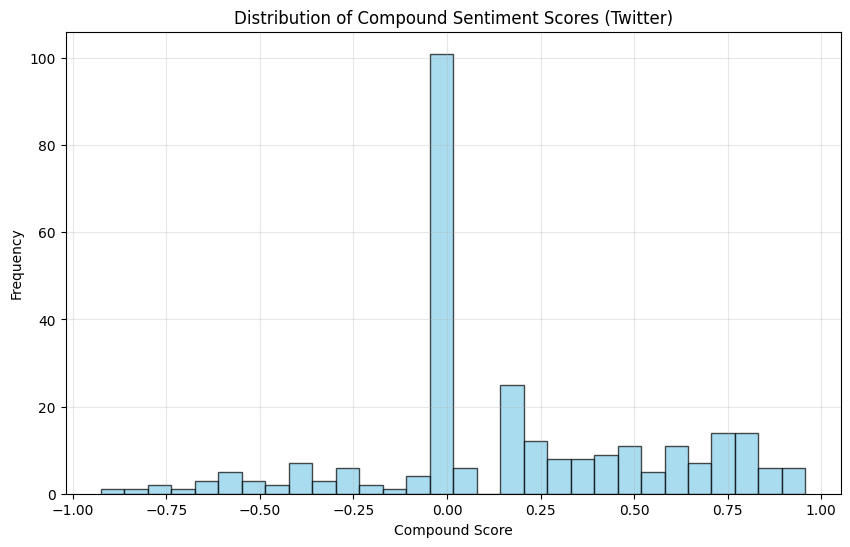

In [96]:
plt.figure(figsize=(10, 6))
plt.hist(twit_sent['compound'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Compound Sentiment Scores (Twitter)")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

Sentiment Distribution:
 sentiment_label
positive    0.478873
neutral     0.383803
negative    0.137324
Name: proportion, dtype: float64


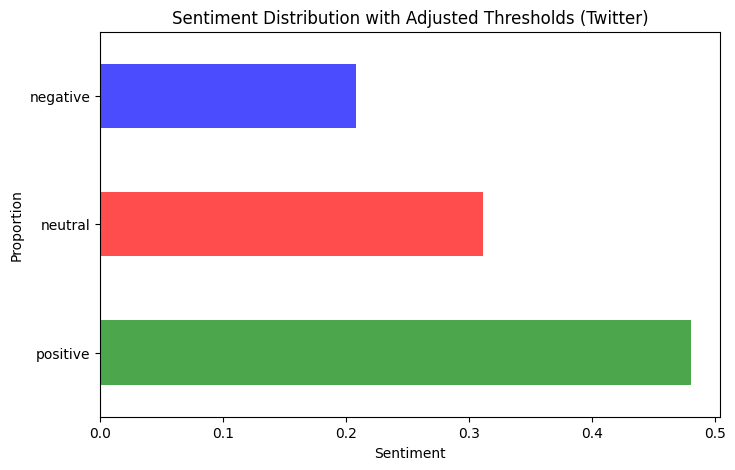

In [97]:
twit_sent['sentiment_label'] = twit_sent['compound'].apply(classify_sentiment)
sent_dist_twit = twit_sent['sentiment_label'].value_counts(normalize=True)
print("Sentiment Distribution:\n", sent_dist_twit)

plt.figure(figsize=(8, 5))
sentiment_distribution.plot(kind='barh', color=['green', 'red', 'blue'], alpha=0.7)
plt.title("Sentiment Distribution with Adjusted Thresholds (Twitter)")
plt.xlabel("Sentiment")
plt.ylabel("Proportion")
plt.show()

In [99]:
eng_mast_ai = mastodon_ai_df[mastodon_ai_df['language'] == 'en']
eng_mast_ai

,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags
1,113639537305656138,2024-12-11 23:50:20+00:00,What if AI can actually help with your burnout...,en,0,0,0,public,[]
2,113637263387670537,2024-12-12 01:30:31.801000+00:00,@fbi @washingtonpost haha dude Biden is really...,en,0,0,0,public,[]
3,113629601136983194,2024-12-10 16:56:54+00:00,Oracle Just Shared Some Amazing Insight With A...,en,0,0,0,public,[]
4,113611582071097671,2024-12-07 12:35:00+00:00,Prediction: This Will Be 2025's Top-Performing...,en,0,0,0,public,[]
5,113611221694921891,2024-12-07 11:05:00+00:00,Should You Forget Palantir and Buy These 2 Art...,en,0,0,0,public,[]
...,...,...,...,...,...,...,...,...,...
550,108187053885501189,2022-04-24 12:30:33+00:00,"@loveisgrief ja, klar gibts immer viel zu beri...",en,1,0,0,public,[]
551,107374987354924180,2021-12-02 02:31:22+00:00,Homeland security is requesting comments from ...,en,0,3,1,public,"[{'name': 'privacy', 'url': 'https://mastodon...."
552,103172496385073778,2019-11-20 22:02:37+00:00,"Perhaps they, given the increase of intelligen...",en,1,0,0,public,[]
553,101890578358125434,2019-04-08 12:33:56+00:00,"""UK businesses using artificial intelligence t...",en,0,1,0,public,"[{'name': 'ai', 'url': 'https://mastodon.socia..."


In [100]:
def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False  # Handle cases where detection fails

# Filter the DataFrame for English texts
eng_mast_ai['is_english'] = eng_mast_ai['content'].apply(is_english)
eng_mast_ai = eng_mast_ai[eng_mast_ai['is_english']]

eng_mast_ai

C:\Users\jawad\AppData\Local\Temp\ipykernel_11408\1869754018.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mast_ai['is_english'] = eng_mast_ai['content'].apply(is_english)


,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags,is_english
1,113639537305656138,2024-12-11 23:50:20+00:00,What if AI can actually help with your burnout...,en,0,0,0,public,[],True
2,113637263387670537,2024-12-12 01:30:31.801000+00:00,@fbi @washingtonpost haha dude Biden is really...,en,0,0,0,public,[],True
3,113629601136983194,2024-12-10 16:56:54+00:00,Oracle Just Shared Some Amazing Insight With A...,en,0,0,0,public,[],True
4,113611582071097671,2024-12-07 12:35:00+00:00,Prediction: This Will Be 2025's Top-Performing...,en,0,0,0,public,[],True
5,113611221694921891,2024-12-07 11:05:00+00:00,Should You Forget Palantir and Buy These 2 Art...,en,0,0,0,public,[],True
...,...,...,...,...,...,...,...,...,...,...
549,109444355391531549,2022-12-02 13:38:48+00:00,Last batch of slides for my advisory group's p...,en,1,2,0,public,"[{'name': 'arrl', 'url': 'https://mastodon.soc...",True
551,107374987354924180,2021-12-02 02:31:22+00:00,Homeland security is requesting comments from ...,en,0,3,1,public,"[{'name': 'privacy', 'url': 'https://mastodon....",True
552,103172496385073778,2019-11-20 22:02:37+00:00,"Perhaps they, given the increase of intelligen...",en,1,0,0,public,[],True
553,101890578358125434,2019-04-08 12:33:56+00:00,"""UK businesses using artificial intelligence t...",en,0,1,0,public,"[{'name': 'ai', 'url': 'https://mastodon.socia...",True


In [101]:
# Cleaning Toot content from punctuation, URLs and @s:
eng_mast_ai['content'] = eng_mast_ai['content'].replace(r'[^\w\s]', '', regex=True)
eng_mast_ai['content'] = eng_mast_ai['content'].replace(r'@\w+', '', regex=True)
eng_mast_ai['content'] = eng_mast_ai['content'].replace(r'http\S+|www\S+', '', regex=True)

eng_mast_ai['content'] = eng_mast_ai['content'].str.lower()

cleaned_mast_ai = eng_mast_ai.copy()
cleaned_mast_ai = cleaned_mast_ai.dropna()
cleaned_mast_ai

C:\Users\jawad\AppData\Local\Temp\ipykernel_11408\3102623918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mast_ai['content'] = eng_mast_ai['content'].replace(r'[^\w\s]', '', regex=True)
C:\Users\jawad\AppData\Local\Temp\ipykernel_11408\3102623918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mast_ai['content'] = eng_mast_ai['content'].replace(r'@\w+', '', regex=True)
C:\Users\jawad\AppData\Local\Temp\ipykernel_11408\3102623918.py:4: SettingWithCopyWarning: 
A value is trying to be set o

,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags,is_english
1,113639537305656138,2024-12-11 23:50:20+00:00,what if ai can actually help with your burnout...,en,0,0,0,public,[],True
2,113637263387670537,2024-12-12 01:30:31.801000+00:00,fbi washingtonpost haha dude biden is really t...,en,0,0,0,public,[],True
3,113629601136983194,2024-12-10 16:56:54+00:00,oracle just shared some amazing insight with a...,en,0,0,0,public,[],True
4,113611582071097671,2024-12-07 12:35:00+00:00,prediction this will be 2025s topperforming ar...,en,0,0,0,public,[],True
5,113611221694921891,2024-12-07 11:05:00+00:00,should you forget palantir and buy these 2 art...,en,0,0,0,public,[],True
...,...,...,...,...,...,...,...,...,...,...
549,109444355391531549,2022-12-02 13:38:48+00:00,last batch of slides for my advisory groups pr...,en,1,2,0,public,"[{'name': 'arrl', 'url': 'https://mastodon.soc...",True
551,107374987354924180,2021-12-02 02:31:22+00:00,homeland security is requesting comments from ...,en,0,3,1,public,"[{'name': 'privacy', 'url': 'https://mastodon....",True
552,103172496385073778,2019-11-20 22:02:37+00:00,perhaps they given the increase of intelligenc...,en,1,0,0,public,[],True
553,101890578358125434,2019-04-08 12:33:56+00:00,uk businesses using artificial intelligence to...,en,0,1,0,public,"[{'name': 'ai', 'url': 'https://mastodon.socia...",True


In [102]:
content_list = cleaned_mast_ai['content'].values
sentiments_ai = []

for con in content_list:
    sent = snet_analyzer.polarity_scores(con)
    sentiments_ai.append(sent)

In [103]:
sent_df_ai = pd.DataFrame(sentiments_ai)
sentiments_ai = pd.concat([cleaned_mast_ai.reset_index(drop=True), sent_df_ai], axis=1)
sentiments_ai

,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags,is_english,neg,neu,pos,compound
0,113639537305656138,2024-12-11 23:50:20+00:00,what if ai can actually help with your burnout...,en,0,0,0,public,[],True,0.000,0.816,0.184,0.4019
1,113637263387670537,2024-12-12 01:30:31.801000+00:00,fbi washingtonpost haha dude biden is really t...,en,0,0,0,public,[],True,0.069,0.848,0.083,0.3071
2,113629601136983194,2024-12-10 16:56:54+00:00,oracle just shared some amazing insight with a...,en,0,0,0,public,[],True,0.000,0.492,0.508,0.8519
3,113611582071097671,2024-12-07 12:35:00+00:00,prediction this will be 2025s topperforming ar...,en,0,0,0,public,[],True,0.000,0.807,0.193,0.4767
4,113611221694921891,2024-12-07 11:05:00+00:00,should you forget palantir and buy these 2 art...,en,0,0,0,public,[],True,0.100,0.737,0.163,0.2960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,109444355391531549,2022-12-02 13:38:48+00:00,last batch of slides for my advisory groups pr...,en,1,2,0,public,"[{'name': 'arrl', 'url': 'https://mastodon.soc...",True,0.000,0.878,0.122,0.8720
461,107374987354924180,2021-12-02 02:31:22+00:00,homeland security is requesting comments from ...,en,0,3,1,public,"[{'name': 'privacy', 'url': 'https://mastodon....",True,0.000,0.845,0.155,0.6705
462,103172496385073778,2019-11-20 22:02:37+00:00,perhaps they given the increase of intelligenc...,en,1,0,0,public,[],True,0.099,0.651,0.249,0.7351
463,101890578358125434,2019-04-08 12:33:56+00:00,uk businesses using artificial intelligence to...,en,0,1,0,public,"[{'name': 'ai', 'url': 'https://mastodon.socia...",True,0.000,0.898,0.102,0.4939


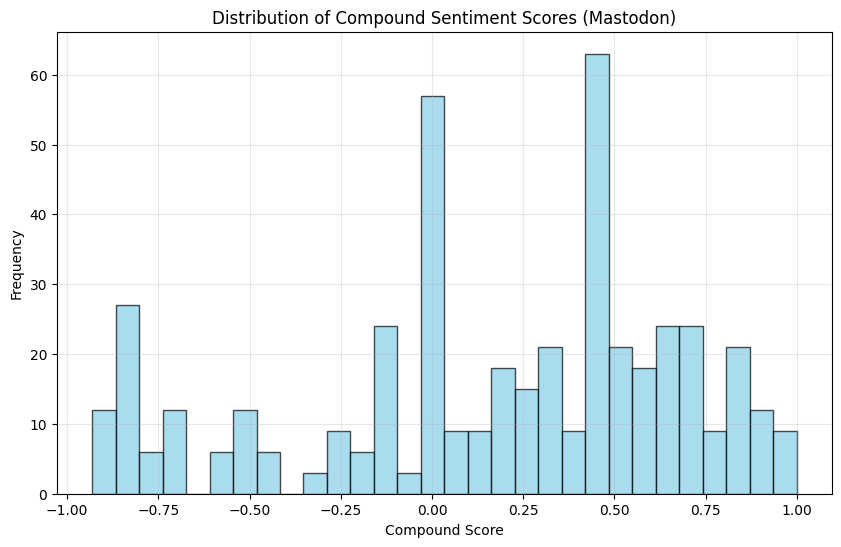

In [104]:
plt.figure(figsize=(10, 6))
plt.hist(sentiments_ai['compound'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Compound Sentiment Scores (Mastodon)")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

Sentiment Distribution:
 sentiment_label
positive    0.587097
negative    0.264516
neutral     0.148387
Name: proportion, dtype: float64


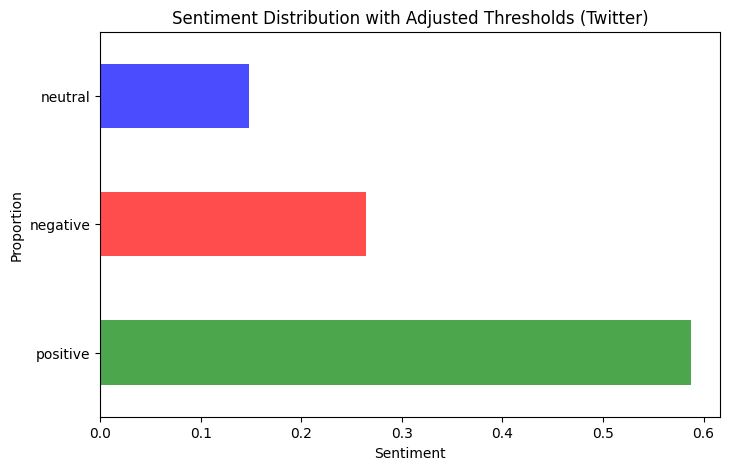

In [105]:
sentiments_ai['sentiment_label'] = sentiments_ai['compound'].apply(classify_sentiment)
sent_dist_ai = sentiments_ai['sentiment_label'].value_counts(normalize=True)
print("Sentiment Distribution:\n", sent_dist_ai)

plt.figure(figsize=(8, 5))
sent_dist_ai.plot(kind='barh', color=['green', 'red', 'blue'], alpha=0.7)
plt.title("Sentiment Distribution with Adjusted Thresholds (Mastodon)")
plt.xlabel("Sentiment")
plt.ylabel("Proportion")
plt.show()